In [1]:
import os
import sys
import numpy as np

from tensorflow import keras

module_path = os.path.abspath(os.path.join('..', '..', '..'))

if module_path not in sys.path:
    sys.path.append(os.path.join(module_path))

from functions.augmentation import get_augmentation_layers
from functions.loading_data import load_dataset, load_rebalanced_dataset
from functions.model_running import get_run_number, run_model
from models.inception_resnet_v2_models import get_model_with_attention

In [2]:
WIDTH = 150
HEIGHT = 150
ROOT = os.path.join('..', '..', '..', '..')
DS_NAME = 'data1'
DATA_DIR = os.path.join(
    ROOT,
    '..',
    DS_NAME,
    'images_original_inception_resnet_v2_150x150_categorized')
MODEL_NAME_BASE = 'inception_dealing_with_imbalance_using_oversampling_and_bias_initialization_3_whole_model_trainable_with_attention_module_on_top_and_200_epoch'

In [3]:
BATCH_SIZE = 64
unbalanced_dataset = load_dataset(WIDTH, HEIGHT, DATA_DIR, 'training', BATCH_SIZE)
balanced_train_dataset = load_rebalanced_dataset(WIDTH, HEIGHT, DATA_DIR, 'training', BATCH_SIZE)

Found 8015 files belonging to 7 classes.
Found 8015 files belonging to 7 classes.


In [4]:
all_labels = []

for images, labels in balanced_train_dataset.take(100):
    all_labels.append(labels.numpy())

all_labels = np.concatenate(all_labels)
class_counts = np.sum(all_labels, axis=0)

In [5]:
mean_class_count = np.mean(class_counts)
resampled_steps_per_epoch = np.ceil(2.0 * mean_class_count / BATCH_SIZE)

In [6]:
METRICS = [
    keras.metrics.CategoricalCrossentropy(name='categorical cross entropy'),
    keras.metrics.MeanSquaredError(name='mean squared error'),
    keras.metrics.CategoricalAccuracy(name='accuracy'),
    keras.metrics.AUC(name='auc', multi_label=True),
    keras.metrics.AUC(name='prc', curve='PR', multi_label=True)
]

In [7]:
train_ds_dir = os.path.join(DATA_DIR, 'training')
class_dirs = [
    os.path.join(train_ds_dir, class_dir)
    for class_dir in os.listdir(train_ds_dir)
    if os.path.isdir(os.path.join(train_ds_dir, class_dir))]
class_counts = [len(os.listdir(class_dir)) for class_dir in class_dirs]
total_samples = np.sum(class_counts)
initial_biases = np.log(class_counts / (total_samples - class_counts))

Found 8015 files belonging to 7 classes.
Found 2000 files belonging to 7 classes.
Epoch 1/200
29/29 [==============================] - ETA: 0s - loss: 1.0777 - categorical cross entropy: 1.0777 - mean squared error: 0.0688 - accuracy: 0.6676 - auc: 0.6409 - prc: 0.2037

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_oversampling_and_bias_initialization_3_whole_model_trainable_with_attention_module_on_top_and_200_epoch_10_1\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_oversampling_and_bias_initialization_3_whole_model_trainable_with_attention_module_on_top_and_200_epoch_10_1\assets


29/29 [==============================] - 160s 3s/step - loss: 1.0777 - categorical cross entropy: 1.0777 - mean squared error: 0.0688 - accuracy: 0.6676 - auc: 0.6409 - prc: 0.2037 - val_loss: 1.1769 - val_categorical cross entropy: 1.1769 - val_mean squared error: 0.0777 - val_accuracy: 0.6705 - val_auc: 0.5000 - val_prc: 0.1429 - lr: 0.0010
Epoch 2/200
29/29 [==============================] - 15s 509ms/step - loss: 0.9384 - categorical cross entropy: 0.9384 - mean squared error: 0.0600 - accuracy: 0.6880 - auc: 0.7470 - prc: 0.2476 - val_loss: 3397.6323 - val_categorical cross entropy: 3397.6323 - val_mean squared error: 0.0941 - val_accuracy: 0.6705 - val_auc: 0.5000 - val_prc: 0.1429 - lr: 0.0010
Epoch 3/200
29/29 [==============================] - 18s 623ms/step - loss: 0.8896 - categorical cross entropy: 0.8896 - mean squared error: 0.0570 - accuracy: 0.6886 - auc: 0.7985 - prc: 0.2593 - val_loss: 1.2280 - val_categorical cross entropy: 1.2280 - val_mean squared error: 0.0800 - v

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_oversampling_and_bias_initialization_3_whole_model_trainable_with_attention_module_on_top_and_200_epoch_10_7\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_oversampling_and_bias_initialization_3_whole_model_trainable_with_attention_module_on_top_and_200_epoch_10_7\assets


29/29 [==============================] - 76s 3s/step - loss: 0.9946 - categorical cross entropy: 0.9946 - mean squared error: 0.0665 - accuracy: 0.6422 - auc: 0.7182 - prc: 0.2159 - val_loss: 0.9068 - val_categorical cross entropy: 0.9068 - val_mean squared error: 0.0590 - val_accuracy: 0.6705 - val_auc: 0.7795 - val_prc: 0.2347 - lr: 0.0010
Epoch 8/200
29/29 [==============================] - 13s 434ms/step - loss: 0.8807 - categorical cross entropy: 0.8807 - mean squared error: 0.0574 - accuracy: 0.6778 - auc: 0.7942 - prc: 0.2375 - val_loss: 0.9263 - val_categorical cross entropy: 0.9263 - val_mean squared error: 0.0599 - val_accuracy: 0.6490 - val_auc: 0.7717 - val_prc: 0.2328 - lr: 0.0010
Epoch 9/200
29/29 [==============================] - 14s 505ms/step - loss: 0.8569 - categorical cross entropy: 0.8569 - mean squared error: 0.0564 - accuracy: 0.6805 - auc: 0.8230 - prc: 0.2478 - val_loss: 0.9420 - val_categorical cross entropy: 0.9420 - val_mean squared error: 0.0626 - val_accu

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_oversampling_and_bias_initialization_3_whole_model_trainable_with_attention_module_on_top_and_200_epoch_10_10\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_oversampling_and_bias_initialization_3_whole_model_trainable_with_attention_module_on_top_and_200_epoch_10_10\assets


29/29 [==============================] - 77s 3s/step - loss: 0.8537 - categorical cross entropy: 0.8537 - mean squared error: 0.0565 - accuracy: 0.6940 - auc: 0.8126 - prc: 0.2533 - val_loss: 0.8403 - val_categorical cross entropy: 0.8403 - val_mean squared error: 0.0560 - val_accuracy: 0.6945 - val_auc: 0.8095 - val_prc: 0.2547 - lr: 0.0010
Epoch 11/200
29/29 [==============================] - ETA: 0s - loss: 0.8411 - categorical cross entropy: 0.8411 - mean squared error: 0.0558 - accuracy: 0.6934 - auc: 0.8196 - prc: 0.2576

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_oversampling_and_bias_initialization_3_whole_model_trainable_with_attention_module_on_top_and_200_epoch_10_11\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_oversampling_and_bias_initialization_3_whole_model_trainable_with_attention_module_on_top_and_200_epoch_10_11\assets


29/29 [==============================] - 75s 3s/step - loss: 0.8411 - categorical cross entropy: 0.8411 - mean squared error: 0.0558 - accuracy: 0.6934 - auc: 0.8196 - prc: 0.2576 - val_loss: 0.8363 - val_categorical cross entropy: 0.8363 - val_mean squared error: 0.0556 - val_accuracy: 0.7005 - val_auc: 0.8162 - val_prc: 0.2757 - lr: 0.0010
Epoch 12/200
29/29 [==============================] - 12s 405ms/step - loss: 0.8245 - categorical cross entropy: 0.8245 - mean squared error: 0.0545 - accuracy: 0.7015 - auc: 0.8201 - prc: 0.2866 - val_loss: 0.8540 - val_categorical cross entropy: 0.8540 - val_mean squared error: 0.0568 - val_accuracy: 0.7040 - val_auc: 0.8196 - val_prc: 0.3254 - lr: 0.0010
Epoch 13/200
29/29 [==============================] - 13s 458ms/step - loss: 0.8359 - categorical cross entropy: 0.8359 - mean squared error: 0.0566 - accuracy: 0.7010 - auc: 0.8376 - prc: 0.2917 - val_loss: 1.0552 - val_categorical cross entropy: 1.0552 - val_mean squared error: 0.0600 - val_ac

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_oversampling_and_bias_initialization_3_whole_model_trainable_with_attention_module_on_top_and_200_epoch_10_23\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_oversampling_and_bias_initialization_3_whole_model_trainable_with_attention_module_on_top_and_200_epoch_10_23\assets


29/29 [==============================] - 86s 3s/step - loss: 0.7318 - categorical cross entropy: 0.7318 - mean squared error: 0.0509 - accuracy: 0.7338 - auc: 0.8910 - prc: 0.3973 - val_loss: 0.7954 - val_categorical cross entropy: 0.7954 - val_mean squared error: 0.0557 - val_accuracy: 0.6925 - val_auc: 0.8801 - val_prc: 0.4164 - lr: 9.5000e-04
Epoch 24/200
29/29 [==============================] - 12s 410ms/step - loss: 0.7632 - categorical cross entropy: 0.7632 - mean squared error: 0.0532 - accuracy: 0.7188 - auc: 0.8680 - prc: 0.4170 - val_loss: 0.8813 - val_categorical cross entropy: 0.8813 - val_mean squared error: 0.0602 - val_accuracy: 0.6890 - val_auc: 0.8404 - val_prc: 0.3973 - lr: 9.5000e-04
Epoch 25/200
29/29 [==============================] - 12s 409ms/step - loss: 0.7402 - categorical cross entropy: 0.7402 - mean squared error: 0.0519 - accuracy: 0.7193 - auc: 0.8867 - prc: 0.4238 - val_loss: 0.8513 - val_categorical cross entropy: 0.8513 - val_mean squared error: 0.0581 

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_oversampling_and_bias_initialization_3_whole_model_trainable_with_attention_module_on_top_and_200_epoch_10_29\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_oversampling_and_bias_initialization_3_whole_model_trainable_with_attention_module_on_top_and_200_epoch_10_29\assets


29/29 [==============================] - 88s 3s/step - loss: 0.7471 - categorical cross entropy: 0.7471 - mean squared error: 0.0521 - accuracy: 0.7263 - auc: 0.8883 - prc: 0.4187 - val_loss: 0.7387 - val_categorical cross entropy: 0.7387 - val_mean squared error: 0.0517 - val_accuracy: 0.7330 - val_auc: 0.8802 - val_prc: 0.4670 - lr: 9.5000e-04
Epoch 30/200
29/29 [==============================] - ETA: 0s - loss: 0.6736 - categorical cross entropy: 0.6736 - mean squared error: 0.0477 - accuracy: 0.7597 - auc: 0.9039 - prc: 0.4593

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_oversampling_and_bias_initialization_3_whole_model_trainable_with_attention_module_on_top_and_200_epoch_10_30\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_oversampling_and_bias_initialization_3_whole_model_trainable_with_attention_module_on_top_and_200_epoch_10_30\assets


29/29 [==============================] - 79s 3s/step - loss: 0.6736 - categorical cross entropy: 0.6736 - mean squared error: 0.0477 - accuracy: 0.7597 - auc: 0.9039 - prc: 0.4593 - val_loss: 0.7242 - val_categorical cross entropy: 0.7242 - val_mean squared error: 0.0506 - val_accuracy: 0.7300 - val_auc: 0.8814 - val_prc: 0.4869 - lr: 9.5000e-04
Epoch 31/200
29/29 [==============================] - ETA: 0s - loss: 0.7049 - categorical cross entropy: 0.7049 - mean squared error: 0.0487 - accuracy: 0.7478 - auc: 0.8918 - prc: 0.4430

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_oversampling_and_bias_initialization_3_whole_model_trainable_with_attention_module_on_top_and_200_epoch_10_31\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_oversampling_and_bias_initialization_3_whole_model_trainable_with_attention_module_on_top_and_200_epoch_10_31\assets


29/29 [==============================] - 78s 3s/step - loss: 0.7049 - categorical cross entropy: 0.7049 - mean squared error: 0.0487 - accuracy: 0.7478 - auc: 0.8918 - prc: 0.4430 - val_loss: 0.7112 - val_categorical cross entropy: 0.7112 - val_mean squared error: 0.0504 - val_accuracy: 0.7285 - val_auc: 0.8939 - val_prc: 0.4813 - lr: 9.5000e-04
Epoch 32/200
29/29 [==============================] - ETA: 0s - loss: 0.7245 - categorical cross entropy: 0.7245 - mean squared error: 0.0505 - accuracy: 0.7322 - auc: 0.8844 - prc: 0.4640

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_oversampling_and_bias_initialization_3_whole_model_trainable_with_attention_module_on_top_and_200_epoch_10_32\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_oversampling_and_bias_initialization_3_whole_model_trainable_with_attention_module_on_top_and_200_epoch_10_32\assets


29/29 [==============================] - 76s 3s/step - loss: 0.7245 - categorical cross entropy: 0.7245 - mean squared error: 0.0505 - accuracy: 0.7322 - auc: 0.8844 - prc: 0.4640 - val_loss: 0.6995 - val_categorical cross entropy: 0.6995 - val_mean squared error: 0.0487 - val_accuracy: 0.7460 - val_auc: 0.9017 - val_prc: 0.4665 - lr: 9.5000e-04
Epoch 33/200
29/29 [==============================] - 12s 410ms/step - loss: 0.6764 - categorical cross entropy: 0.6764 - mean squared error: 0.0477 - accuracy: 0.7462 - auc: 0.9008 - prc: 0.4722 - val_loss: 0.8146 - val_categorical cross entropy: 0.8146 - val_mean squared error: 0.0565 - val_accuracy: 0.6980 - val_auc: 0.8834 - val_prc: 0.4593 - lr: 9.5000e-04
Epoch 34/200
29/29 [==============================] - 12s 410ms/step - loss: 0.6830 - categorical cross entropy: 0.6830 - mean squared error: 0.0477 - accuracy: 0.7538 - auc: 0.9071 - prc: 0.4860 - val_loss: 0.8588 - val_categorical cross entropy: 0.8588 - val_mean squared error: 0.0589 

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_oversampling_and_bias_initialization_3_whole_model_trainable_with_attention_module_on_top_and_200_epoch_10_37\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_oversampling_and_bias_initialization_3_whole_model_trainable_with_attention_module_on_top_and_200_epoch_10_37\assets


29/29 [==============================] - 84s 3s/step - loss: 0.6785 - categorical cross entropy: 0.6785 - mean squared error: 0.0485 - accuracy: 0.7522 - auc: 0.9133 - prc: 0.4898 - val_loss: 0.6792 - val_categorical cross entropy: 0.6792 - val_mean squared error: 0.0481 - val_accuracy: 0.7490 - val_auc: 0.9030 - val_prc: 0.5163 - lr: 9.5000e-04
Epoch 38/200
29/29 [==============================] - 12s 410ms/step - loss: 0.6587 - categorical cross entropy: 0.6587 - mean squared error: 0.0472 - accuracy: 0.7597 - auc: 0.9041 - prc: 0.4822 - val_loss: 0.7618 - val_categorical cross entropy: 0.7618 - val_mean squared error: 0.0513 - val_accuracy: 0.7280 - val_auc: 0.8842 - val_prc: 0.4416 - lr: 9.5000e-04
Epoch 39/200
29/29 [==============================] - 12s 412ms/step - loss: 0.6688 - categorical cross entropy: 0.6688 - mean squared error: 0.0477 - accuracy: 0.7468 - auc: 0.9091 - prc: 0.4401 - val_loss: 0.7225 - val_categorical cross entropy: 0.7225 - val_mean squared error: 0.0503 

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_oversampling_and_bias_initialization_3_whole_model_trainable_with_attention_module_on_top_and_200_epoch_10_42\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_oversampling_and_bias_initialization_3_whole_model_trainable_with_attention_module_on_top_and_200_epoch_10_42\assets


29/29 [==============================] - 86s 3s/step - loss: 0.6791 - categorical cross entropy: 0.6791 - mean squared error: 0.0479 - accuracy: 0.7548 - auc: 0.9038 - prc: 0.4651 - val_loss: 0.6725 - val_categorical cross entropy: 0.6725 - val_mean squared error: 0.0469 - val_accuracy: 0.7595 - val_auc: 0.9019 - val_prc: 0.5126 - lr: 9.5000e-04
Epoch 43/200
29/29 [==============================] - 12s 408ms/step - loss: 0.6612 - categorical cross entropy: 0.6612 - mean squared error: 0.0478 - accuracy: 0.7516 - auc: 0.9148 - prc: 0.5155 - val_loss: 0.6876 - val_categorical cross entropy: 0.6876 - val_mean squared error: 0.0482 - val_accuracy: 0.7450 - val_auc: 0.8992 - val_prc: 0.5204 - lr: 9.5000e-04
Epoch 44/200
29/29 [==============================] - 12s 411ms/step - loss: 0.6956 - categorical cross entropy: 0.6956 - mean squared error: 0.0491 - accuracy: 0.7559 - auc: 0.9111 - prc: 0.5078 - val_loss: 0.7083 - val_categorical cross entropy: 0.7083 - val_mean squared error: 0.0489 

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_oversampling_and_bias_initialization_3_whole_model_trainable_with_attention_module_on_top_and_200_epoch_10_46\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_oversampling_and_bias_initialization_3_whole_model_trainable_with_attention_module_on_top_and_200_epoch_10_46\assets


29/29 [==============================] - 80s 3s/step - loss: 0.6374 - categorical cross entropy: 0.6374 - mean squared error: 0.0450 - accuracy: 0.7699 - auc: 0.9191 - prc: 0.5030 - val_loss: 0.6295 - val_categorical cross entropy: 0.6295 - val_mean squared error: 0.0447 - val_accuracy: 0.7700 - val_auc: 0.9082 - val_prc: 0.5335 - lr: 9.5000e-04
Epoch 47/200
29/29 [==============================] - 12s 411ms/step - loss: 0.6472 - categorical cross entropy: 0.6472 - mean squared error: 0.0458 - accuracy: 0.7683 - auc: 0.9126 - prc: 0.4991 - val_loss: 0.6886 - val_categorical cross entropy: 0.6886 - val_mean squared error: 0.0480 - val_accuracy: 0.7510 - val_auc: 0.8909 - val_prc: 0.4996 - lr: 9.5000e-04
Epoch 48/200
29/29 [==============================] - 12s 409ms/step - loss: 0.6435 - categorical cross entropy: 0.6435 - mean squared error: 0.0451 - accuracy: 0.7753 - auc: 0.9128 - prc: 0.5091 - val_loss: 0.7764 - val_categorical cross entropy: 0.7764 - val_mean squared error: 0.0496 

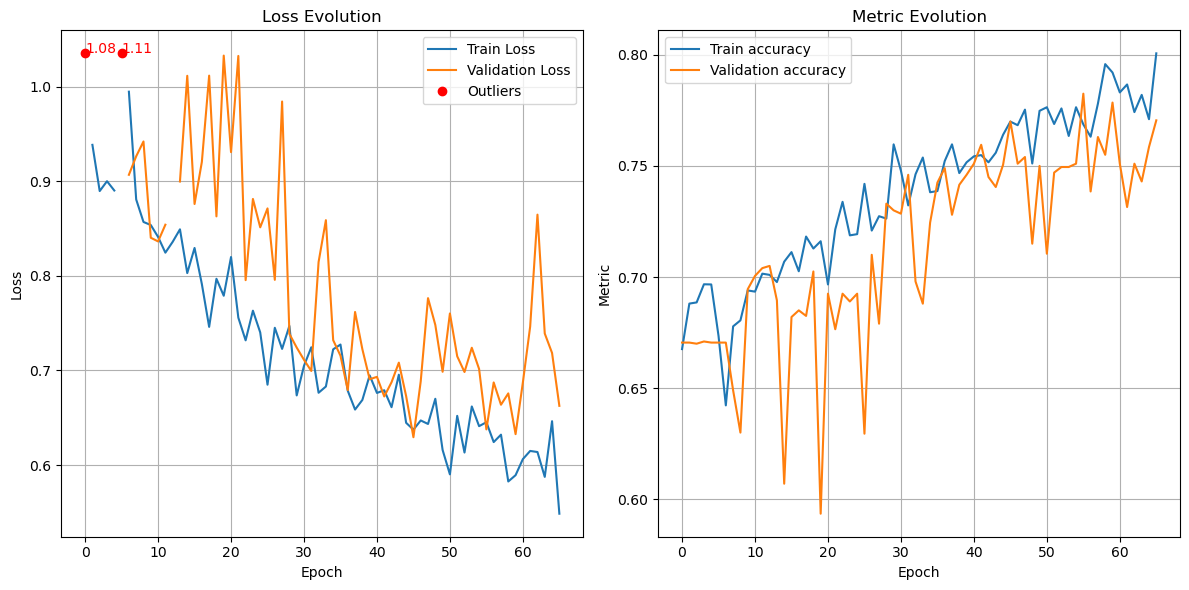

In [8]:
_, history = run_model(
    ROOT,
    HEIGHT,
    WIDTH,
    DATA_DIR,
    DS_NAME,
    MODEL_NAME_BASE,
    lambda num_classes:
        lambda: get_model_with_attention(
            HEIGHT,
            WIDTH,
            num_classes,
            metrics=METRICS,
            biases=keras.initializers.Constant(initial_biases)),
    get_augmentation_layers,
    batch_size=BATCH_SIZE,
    train_dataset=balanced_train_dataset,
    steps_per_epoch=resampled_steps_per_epoch,
    stopping_patience=20,
    epochs=200)